# 1. Chargement et exploration initiale des données
• Importer les bibliothèques nécessaires (pandas, numpy, matplotlib, seaborn, 
sklearn) <br>
• Charger le dataset <br>
• Afficher les premières lignes et les informations de base (types de données, 
statistiques descriptives

In [79]:
#Projet Python pour data sciences 
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sb, sklearn as sk
df=pd.read_csv("Engineering_graduate_salary.csv")

df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [80]:
#Informations sur le dataset : colonnes/nb de valeurs nulles pour chaque colonne/type de variable par colonne
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

In [81]:
#Affichage de données en rapport avec le dataset (par colonne) : nb de valeurs, moyenne, min, max, quartiles
df.describe()

,ID,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2.998000e+03,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,...,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03
mean,6.648926e+05,77.666264,2008.080720,74.341061,5210.210807,1.924616,71.509857,5210.210807,0.296197,2011.939960,...,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05
std,3.648951e+05,10.002785,1.631814,11.120299,4776.609877,0.264053,8.122462,4776.609877,0.456655,36.780582,...,99.785138,86.054739,103.552963,32.241501,1.024974,0.955831,0.962695,1.012901,1.007134,2.123312e+05
min,1.124400e+04,43.000000,1998.000000,40.000000,2.000000,1.000000,6.630000,2.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,3.334648e+05,71.140000,2007.000000,66.000000,526.250000,2.000000,66.530000,526.250000,0.000000,2012.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,6.396945e+05,78.965000,2008.000000,74.000000,4027.500000,2.000000,71.800000,4027.500000,0.000000,2013.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05
75%,9.951770e+05,85.600000,2009.000000,82.600000,8822.250000,2.000000,76.300000,8822.250000,1.000000,2014.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,1.297877e+06,97.760000,2012.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,...,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


# 2. Nettoyage et préparation des données
• Identifier et gérer les valeurs manquantes <br>
• Utiliser des techniques comme l'imputation par la moyenne/médiane ou 
des méthodes plus avancées <br>
• Détecter et traiter les valeurs aberrantes<br>
• Utiliser la méthode IQR (IQR = Q3 - Q1) ou z-score pour identifier les 
outliers<br>
• Décider de les supprimer ou de les transformer selon le contexte


In [82]:
nombre_de_lignes = df.shape[0]
print("Nombre de lignes :", nombre_de_lignes)

# Identification des valeurs manquantes
valeurs_vides = df.isnull().sum()

# On ne veut afficher que les colonnes ayant des valeurs manquantes 
colonnes_vides = valeurs_vides[valeurs_vides != 0]
print("Colonnes vides : ")
print(colonnes_vides)

Nombre de lignes : 2998
Colonnes vides : 
Series([], dtype: int64)


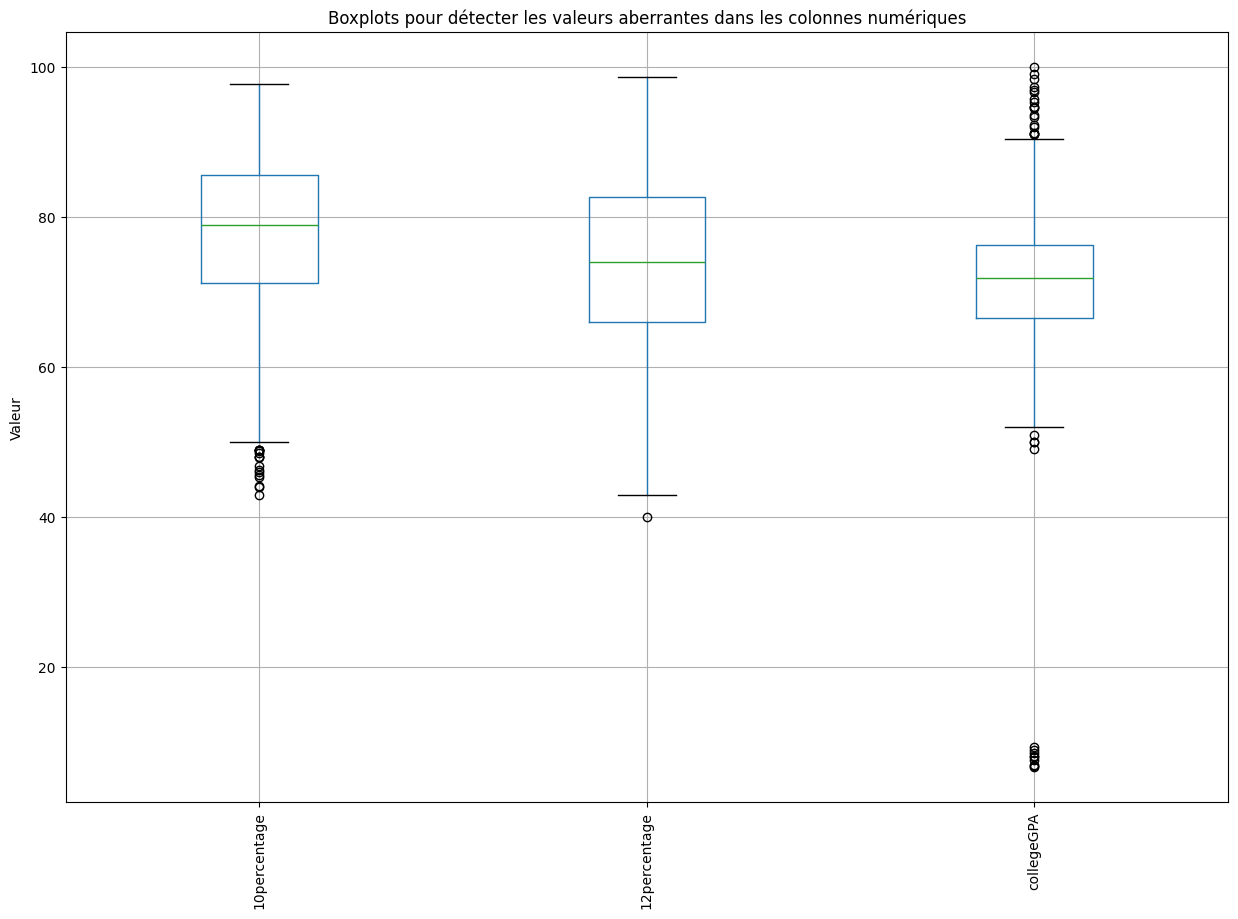

In [83]:

# Liste des colonnes numériques pour détecter les valeurs aberrantes
colonnes_numeriques = [
    '10percentage', '12percentage', 'collegeGPA'
]

# Créer des boxplots pour chaque colonne
plt.figure(figsize=(15, 10))
df[colonnes_numeriques].boxplot()
plt.xticks(rotation=90)
plt.title("Boxplots pour détecter les valeurs aberrantes dans les colonnes numériques")
plt.ylabel("Valeur")
plt.show()


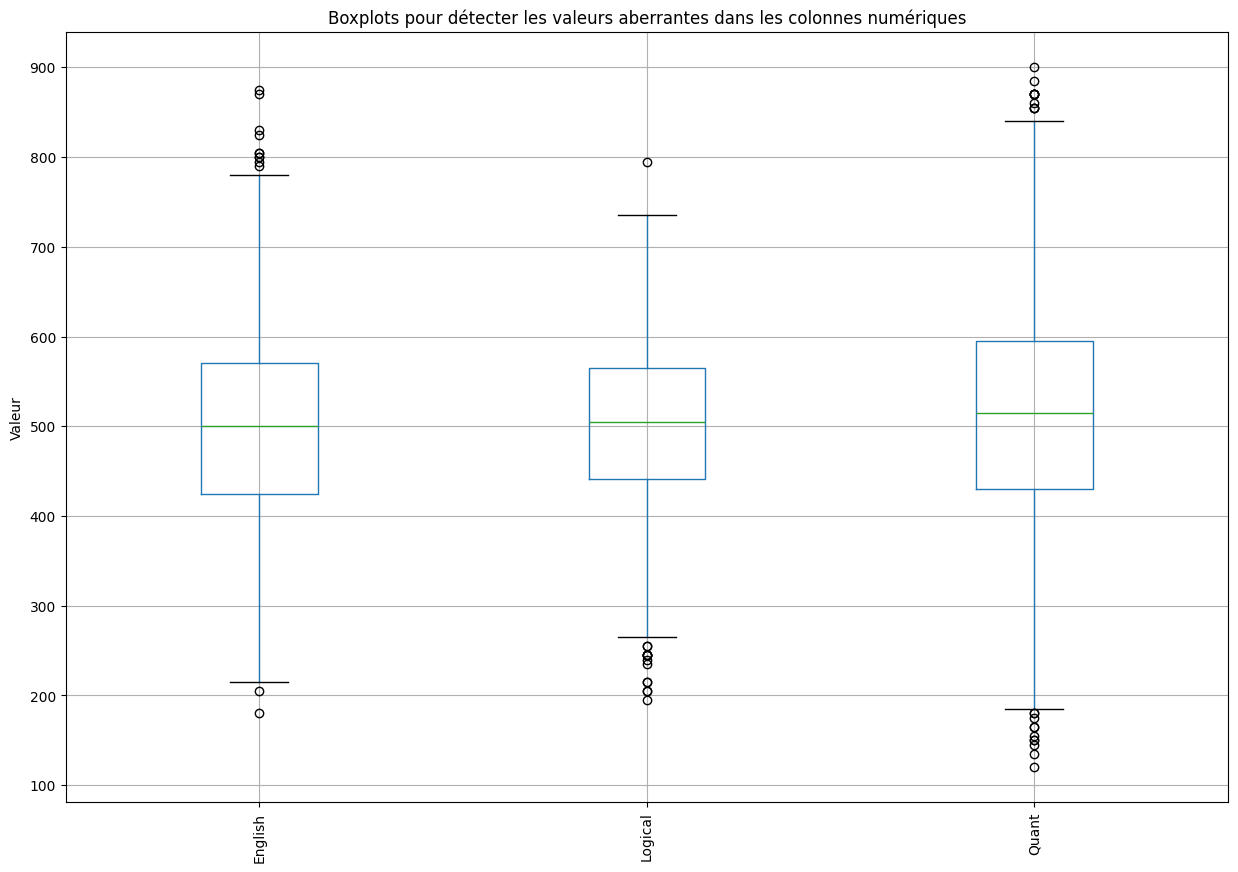

In [84]:

# Liste des colonnes numériques pour détecter les valeurs aberrantes
colonnes_numeriques = [
    'English', 'Logical', 'Quant'
]

# Créer des boxplots pour chaque colonne
plt.figure(figsize=(15, 10))
df[colonnes_numeriques].boxplot()
plt.xticks(rotation=90)
plt.title("Boxplots pour détecter les valeurs aberrantes dans les colonnes numériques")
plt.ylabel("Valeur")
plt.show()


<Axes: ylabel='collegeGPA'>

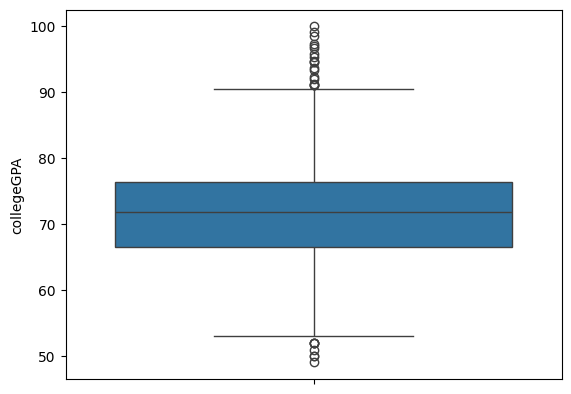

In [85]:
#On observe notamment qu'il y a des valeurs abeerantes pour l'attribut "collegeGPA", c'est à dire la note globale.
#En effet, certains étudiants ont une note globale inférieure à 10/100, ce qui représente plutôt un abandon des études suivies.
#Nous allons donc les supprimer afin de ne garder que les valeurs intéressantes :

df = df[df['collegeGPA']>20]
sb.boxplot(data=df, y='collegeGPA')

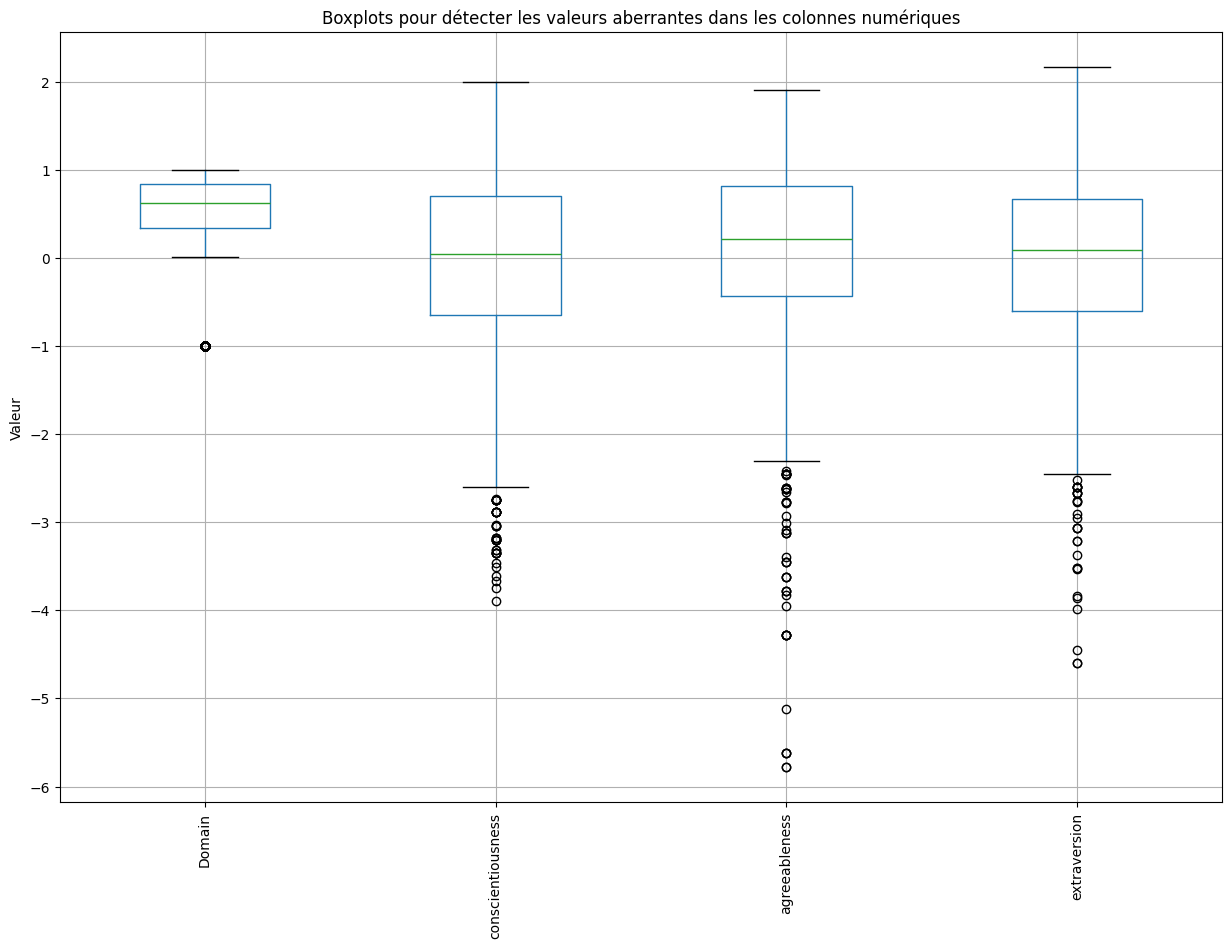

In [86]:
# Liste des colonnes numériques pour détecter les valeurs aberrantes
colonnes_numeriques = [
    'Domain', 'conscientiousness', 'agreeableness', 'extraversion'
]

# Créer des boxplots pour chaque colonne
plt.figure(figsize=(15, 10))
df[colonnes_numeriques].boxplot()
plt.xticks(rotation=90)
plt.title("Boxplots pour détecter les valeurs aberrantes dans les colonnes numériques")
plt.ylabel("Valeur")
plt.show()


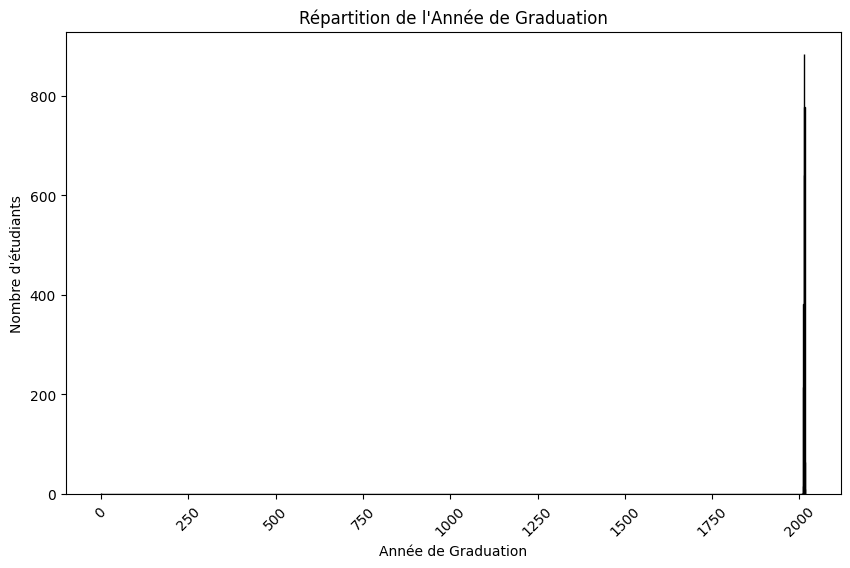

In [87]:
#Traitement Graduation year 
plt.figure(figsize=(10, 6))
plt.hist(df['GraduationYear'].dropna(), bins=range(int(df['GraduationYear'].min()), int(df['GraduationYear'].max()) + 1), edgecolor='black')
plt.xlabel("Année de Graduation")
plt.ylabel("Nombre d'étudiants")
plt.title("Répartition de l'Année de Graduation")
plt.xticks(rotation=45)

plt.show()

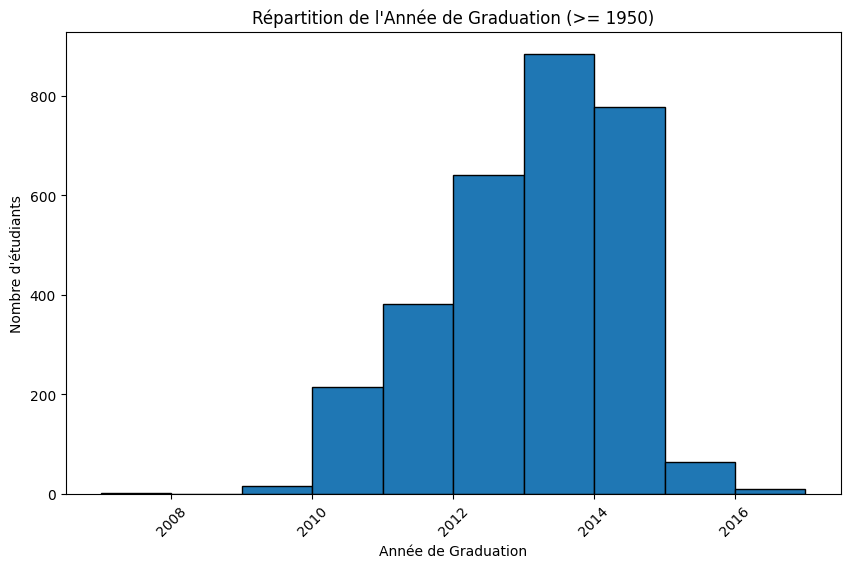

In [88]:
# Filtrer les années de graduation pour conserver celles >= 1950
df = df[df['GraduationYear'] >= 1950]

# Convertir les valeurs de GraduationYear en int
df['GraduationYear'] = df['GraduationYear'].astype(int)

# Vérification de la répartition de l'année de graduation après le filtrage et la conversion
plt.figure(figsize=(10, 6))
plt.hist(df['GraduationYear'].dropna(), bins=range(df['GraduationYear'].min(), df['GraduationYear'].max() + 1), edgecolor='black')
plt.xlabel("Année de Graduation")
plt.ylabel("Nombre d'étudiants")
plt.title("Répartition de l'Année de Graduation (>= 1950)")
plt.xticks(rotation=45)

plt.show()

In [89]:
# Trouver l'année minimale de graduation et compter les occurrences
min_year = df['GraduationYear'].min()
count_min_year = df[df['GraduationYear'] == min_year].shape[0]

print(f"L'année de graduation minimale est : {min_year}")
print(f"Nombre de personnes associées à cette année : {count_min_year}")


L'année de graduation minimale est : 2007
Nombre de personnes associées à cette année : 1


In [90]:
#CollegeID et CollegeCityID
# Comparer les colonnes CollegeID et CollegeCityID
diff_values = df[df['CollegeID'] != df['CollegeCityID']]

# Vérifier s'il y a des valeurs différentes
if not diff_values.empty:
    print("Il y a des valeurs différentes entre CollegeID et CollegeCityID.")
    print(diff_values[['CollegeID', 'CollegeCityID']])
else:
    print("Toutes les valeurs de CollegeID et CollegeCityID sont identiques.")


Toutes les valeurs de CollegeID et CollegeCityID sont identiques.


In [91]:
# Supprimer la colonne CollegeCityID
df = df.drop(columns=['CollegeCityID'])

print("La colonne 'CollegeCityID' a été supprimée.")

La colonne 'CollegeCityID' a été supprimée.


In [92]:
df.describe()

,ID,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,English,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2.988000e+03,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.00000,2988.000000,2988.000000,2988.000000,...,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2.988000e+03
mean,6.647846e+05,77.662450,2008.078313,74.322554,5207.098728,1.925033,71.70242,0.297189,2012.608099,501.071620,...,23.481593,16.325636,31.175703,1.869478,-0.039748,0.126424,-0.008063,-0.145730,-0.140858,3.050800e+05
std,3.650340e+05,9.994608,1.630566,11.122490,4777.935817,0.263381,7.34546,0.457097,1.306173,105.326118,...,98.461180,86.192857,103.709505,31.947904,1.023354,0.955456,0.963304,1.012857,1.007604,2.123831e+05
min,1.124400e+04,43.000000,1998.000000,40.000000,2.000000,1.000000,49.07000,0.000000,2007.000000,180.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,3.334335e+05,71.160000,2007.000000,66.000000,526.000000,2.000000,66.60000,0.000000,2012.000000,425.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,6.396145e+05,78.930000,2008.000000,74.000000,4023.000000,2.000000,71.85000,0.000000,2013.000000,500.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05
75%,9.952940e+05,85.600000,2009.000000,82.600000,8820.750000,2.000000,76.30500,1.000000,2014.000000,570.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,1.297877e+06,97.760000,2012.000000,98.700000,18409.000000,2.000000,99.93000,1.000000,2017.000000,875.000000,...,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


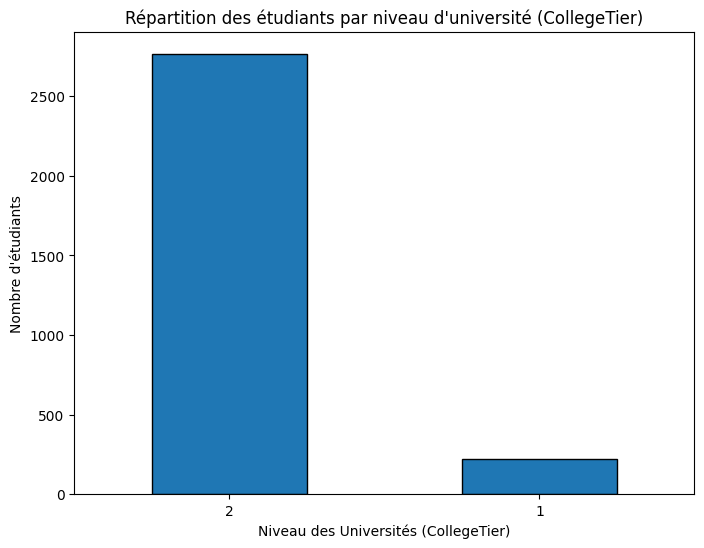

In [93]:
college_tier_counts = df['CollegeTier'].value_counts()

# Créer le graphique en barres
plt.figure(figsize=(8, 6))
college_tier_counts.plot(kind='bar', edgecolor='black')
plt.xlabel("Niveau des Universités (CollegeTier)")
plt.ylabel("Nombre d'étudiants")
plt.title("Répartition des étudiants par niveau d'université (CollegeTier)")
plt.xticks(rotation=0)

plt.show()

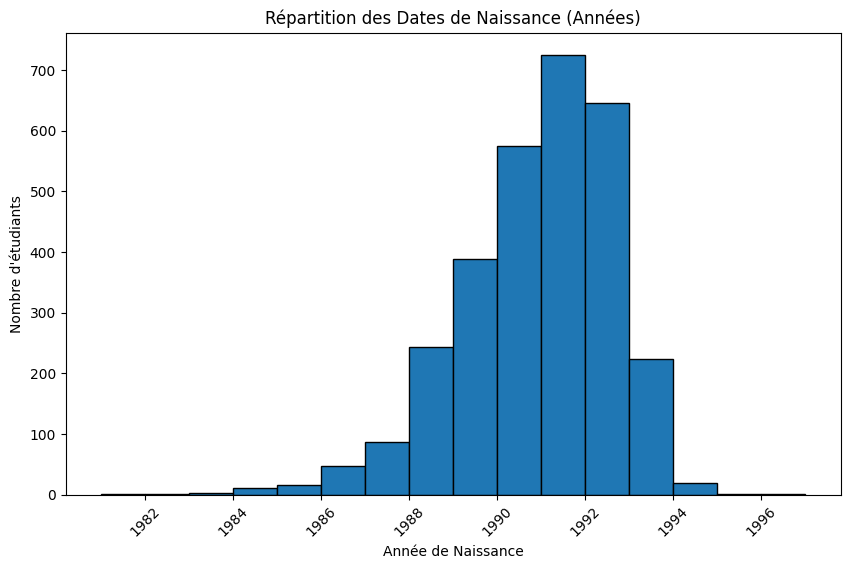

In [94]:
# Convertir la colonne DOB en type datetime si ce n'est pas déjà fait
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')

# Extraire l'année de naissance pour simplifier l'affichage
df['YearOfBirth'] = df['DOB'].dt.year

# Créer l'histogramme pour visualiser la répartition des années de naissance
plt.figure(figsize=(10, 6))
plt.hist(df['YearOfBirth'].dropna(), bins=range(int(df['YearOfBirth'].min()), int(df['YearOfBirth'].max()) + 1), edgecolor='black')
plt.xlabel("Année de Naissance")
plt.ylabel("Nombre d'étudiants")
plt.title("Répartition des Dates de Naissance (Années)")
plt.xticks(rotation=45)

plt.show()


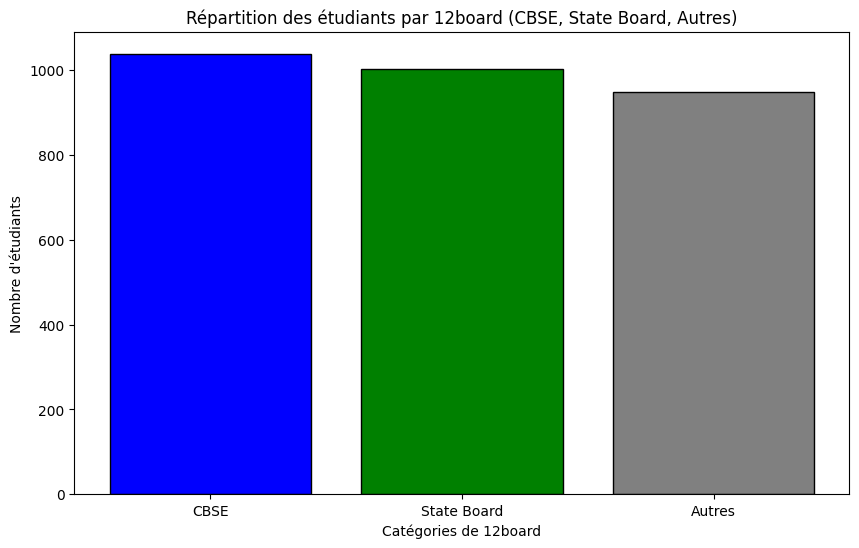

In [95]:
# Créer une nouvelle colonne pour catégoriser 12board en CBSE, State Board, et Autres
df['12board_category'] = df['12board'].apply(lambda x: 'CBSE' if 'cbse' in str(x)
                                              else 'state board' if 'state' in str(x)
                                              else 'Autres')

# Compter les occurrences de chaque catégorie
cbse_count = (df['12board_category'] == 'CBSE').sum()
state_board_count = (df['12board_category'] == 'state board').sum()
others_count = (df['12board_category'] == 'Autres').sum()

# Préparer les données pour l'histogramme
categories = ['CBSE', 'State Board', 'Autres']
counts = [cbse_count, state_board_count, others_count]

# Créer le graphique en barres
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['blue', 'green', 'grey'], edgecolor='black')
plt.xlabel("Catégories de 12board")
plt.ylabel("Nombre d'étudiants")
plt.title("Répartition des étudiants par 12board (CBSE, State Board, Autres)")

plt.show()

# 3. Analyse exploratoire des données (EDA)
• Visualiser la distribution des variables (histogrammes, boxplots) <br>
• Analyser les corrélations entre les variables (heatmap de corrélation)<br>
• Créer des visualisations pertinentes pour comprendre les relations entre les 
variables et le statut diabétique

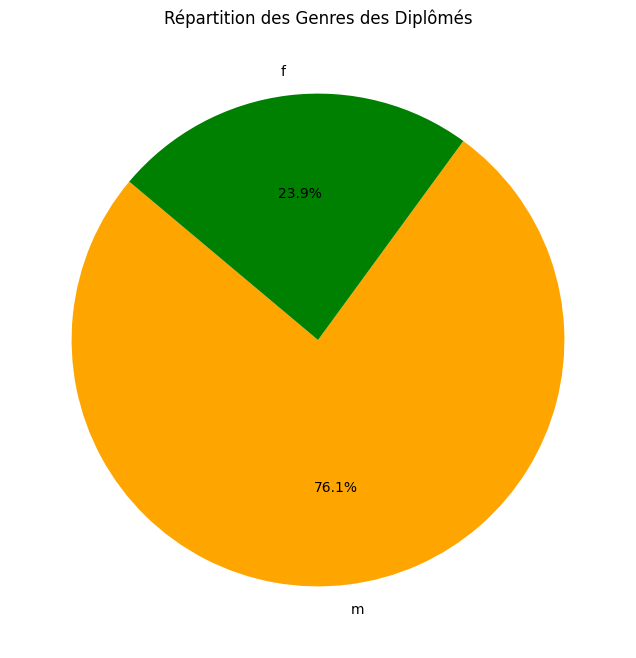

In [96]:
import matplotlib.pyplot as plt

# Graphique en secteurs pour la répartition des genres
plt.figure(figsize=(8, 8))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['orange', 'green'])
plt.title("Répartition des Genres des Diplômés")
plt.ylabel("")  # Enlever l'étiquette de l'axe y pour un meilleur affichage
plt.show()

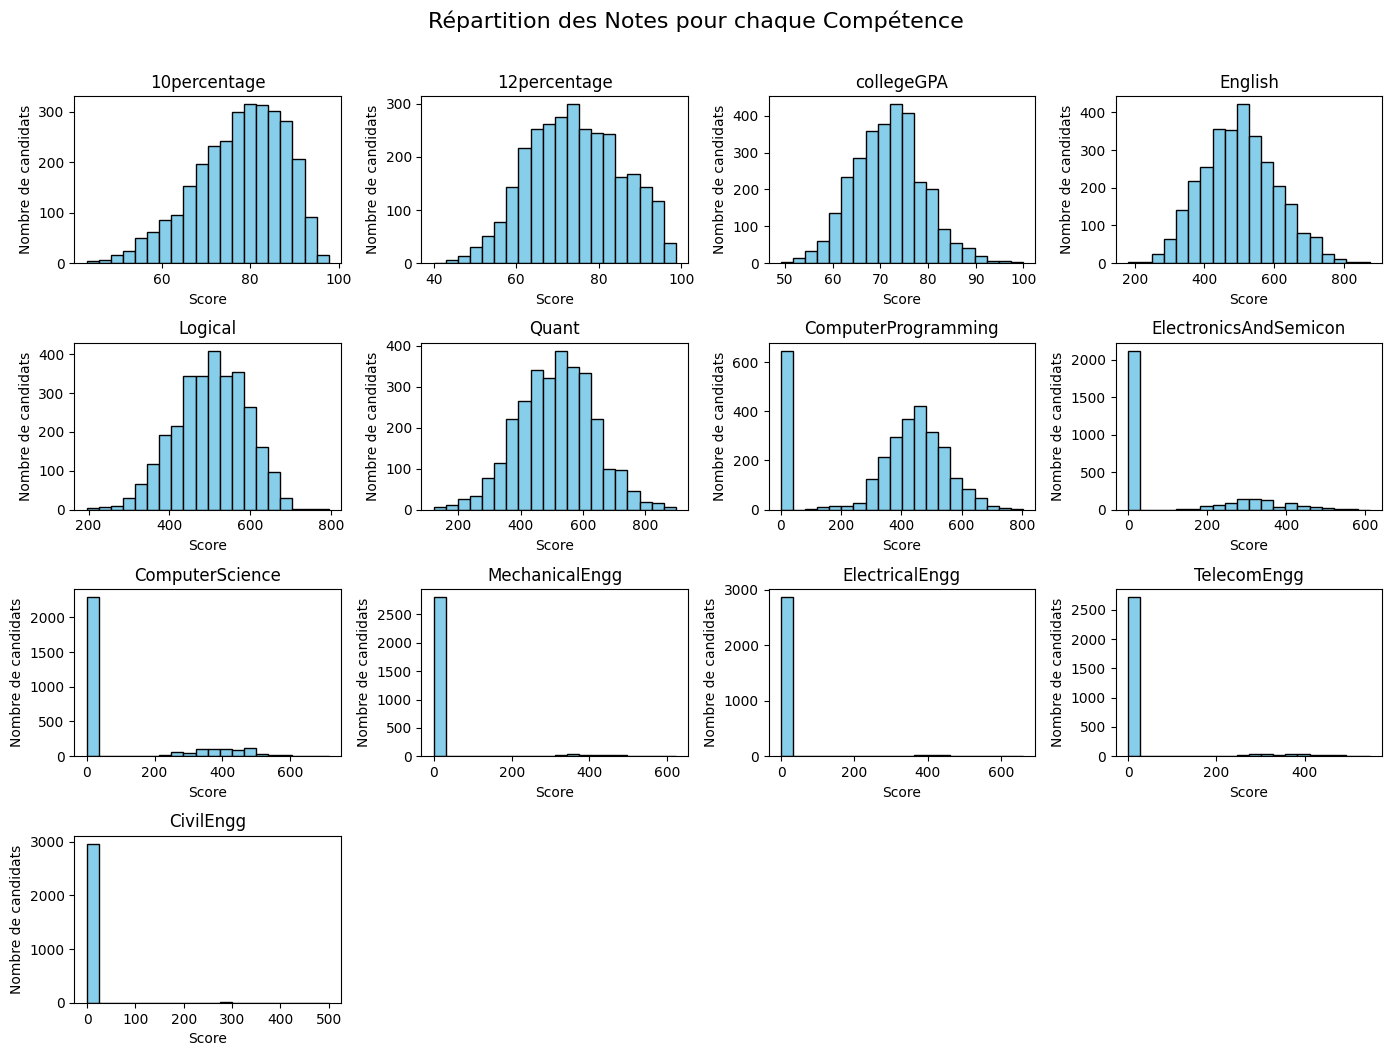

In [97]:
# Liste des colonnes contenant les notes ou scores des candidats
note_columns = ['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 
                'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 
                'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']

# Tracer la répartition des notes pour chaque colonne
plt.figure(figsize=(14, 10))
for i, col in enumerate(note_columns, 1):
    plt.subplot(4, 4, i)  # Subplots 4x4 (ajustement automatique selon le nombre de colonnes)
    plt.hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel('Score')
    plt.ylabel('Nombre de candidats')
    plt.tight_layout(pad=1.0)

plt.suptitle("Répartition des Notes pour chaque Compétence", y=1.05, fontsize=16)
plt.show()

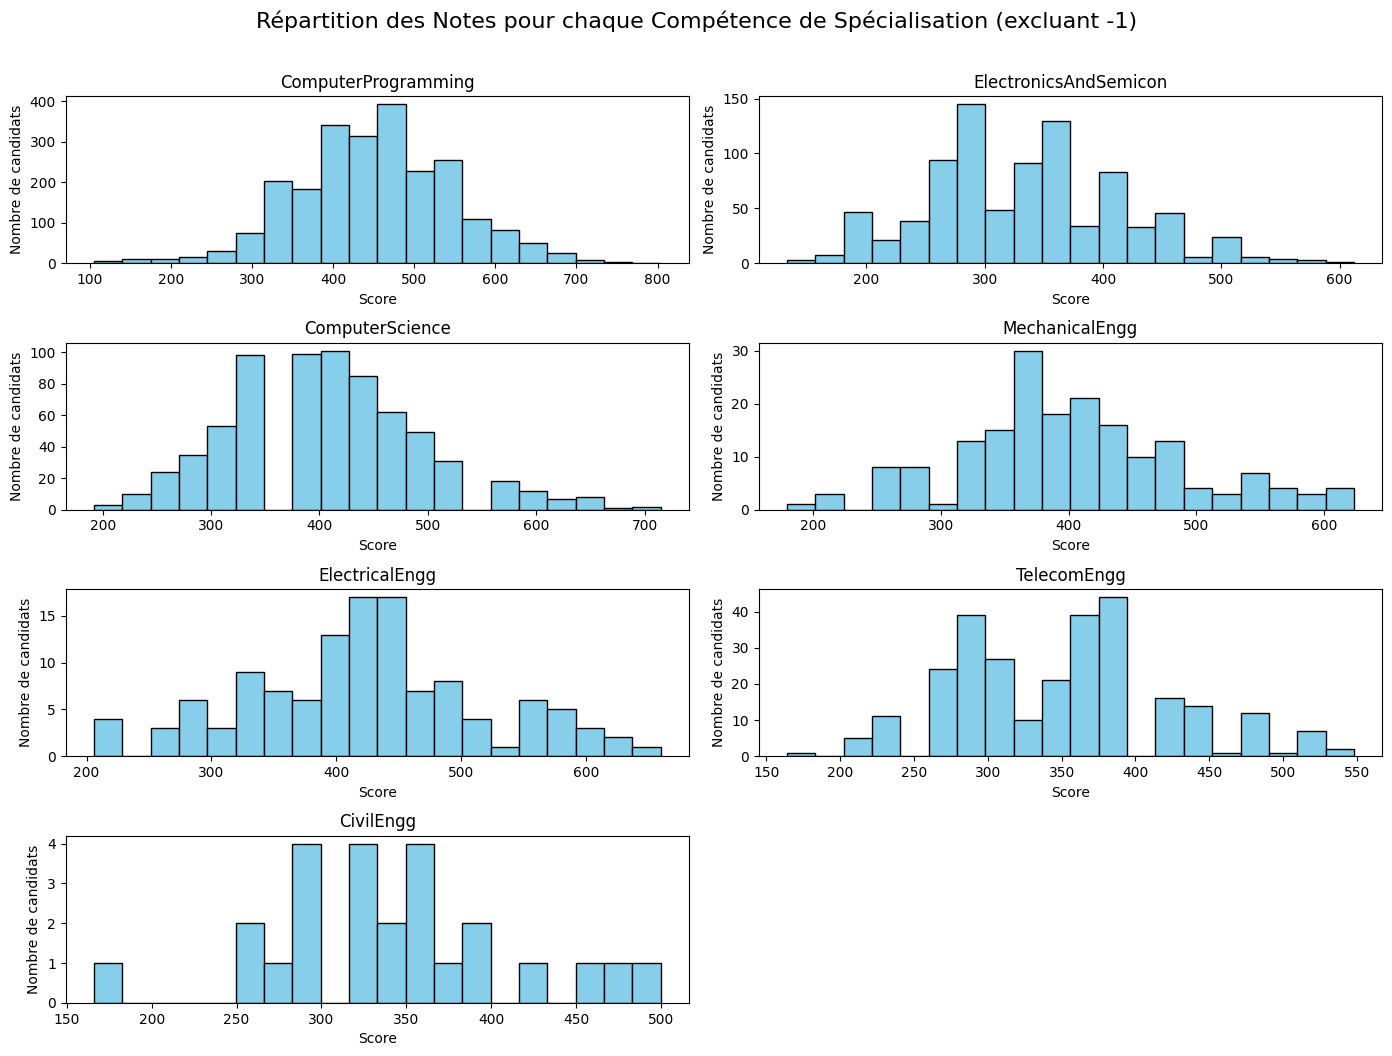

In [98]:
# Exclure les valeurs -1 pour les colonnes de spécialisation avant de tracer les histogrammes
note_columns_specialisation = ['ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 
                               'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']

# Tracer la répartition des notes pour chaque colonne de spécialisation, sans les -1
plt.figure(figsize=(14, 10))
for i, col in enumerate(note_columns_specialisation, 1):
    plt.subplot(4, 2, i)  # Subplots arrangés pour une meilleure visibilité
    plt.hist(df[col][df[col] != -1].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel('Score')
    plt.ylabel('Nombre de candidats')
    plt.tight_layout(pad=1.0)

plt.suptitle("Répartition des Notes pour chaque Compétence de Spécialisation (excluant -1)", y=1.05, fontsize=16)
plt.show()
# Nous n'avions pas enlevé les -1 avant car ce ne sont pas des valeurs fausses, mais des gens non concernés. Les -1 sont utilisés pour 
# l'analyse et donc utiles

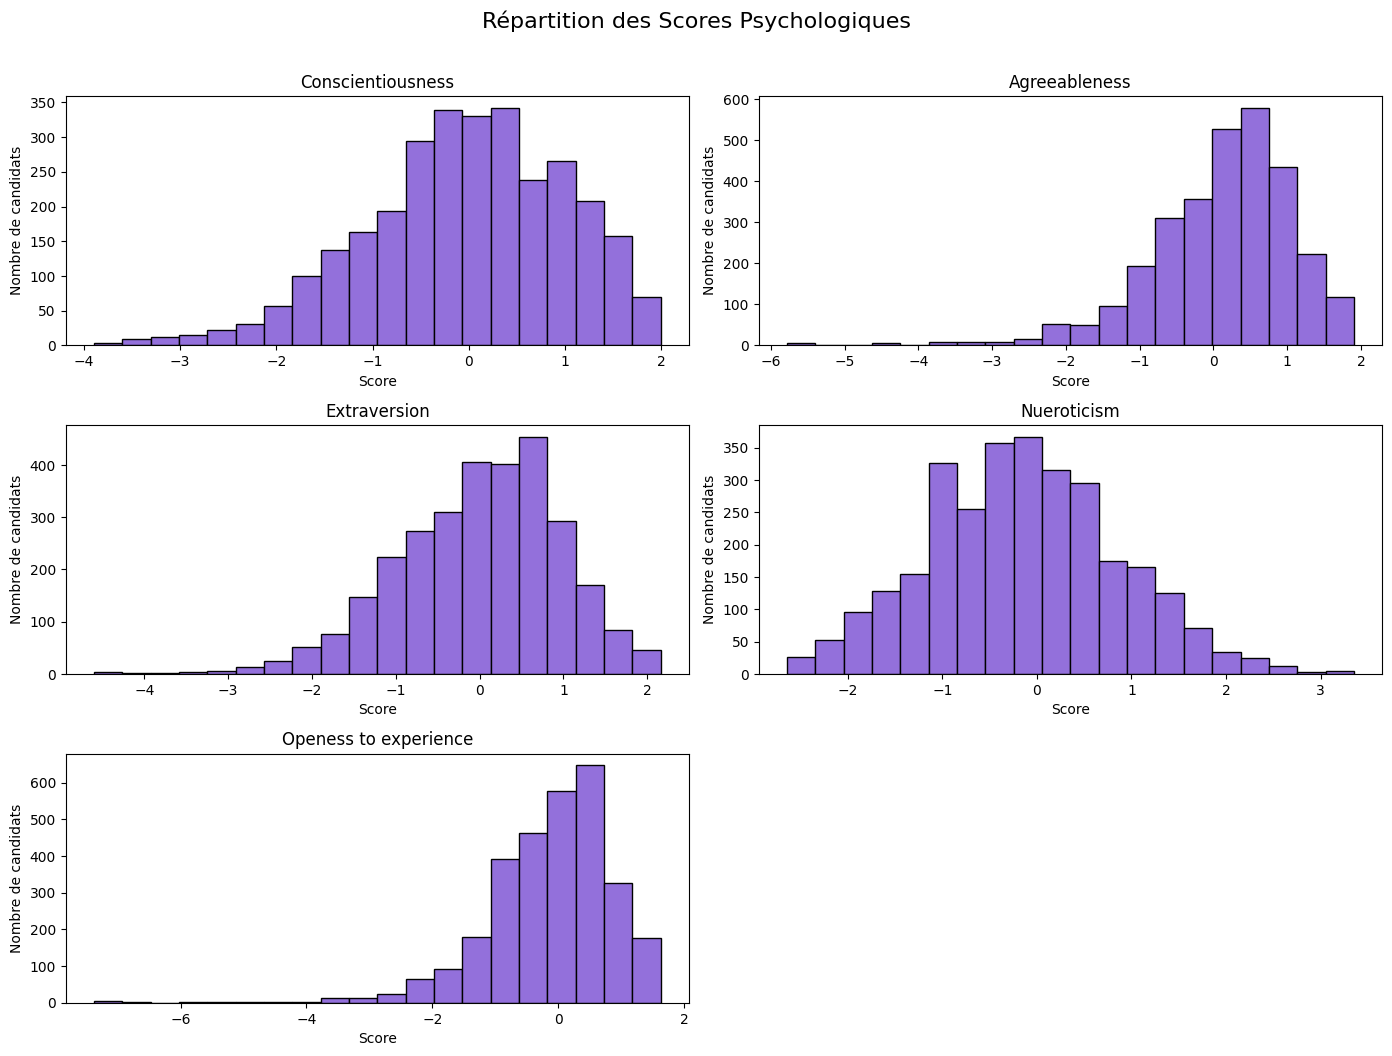

In [99]:
# Liste des colonnes de scores psychologiques avec les noms corrigés
psychological_scores_corrected = ['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

# Tracer la répartition des scores psychologiques avec les noms corrigés
plt.figure(figsize=(14, 10))
for i, col in enumerate(psychological_scores_corrected, 1):
    plt.subplot(3, 2, i)
    plt.hist(df[col].dropna(), bins=20, color='mediumpurple', edgecolor='black')
    plt.title(col.capitalize().replace("_", " "))
    plt.xlabel("Score")
    plt.ylabel("Nombre de candidats")
    plt.tight_layout(pad=1.0)

plt.suptitle("Répartition des Scores Psychologiques", y=1.05, fontsize=16)
plt.show()

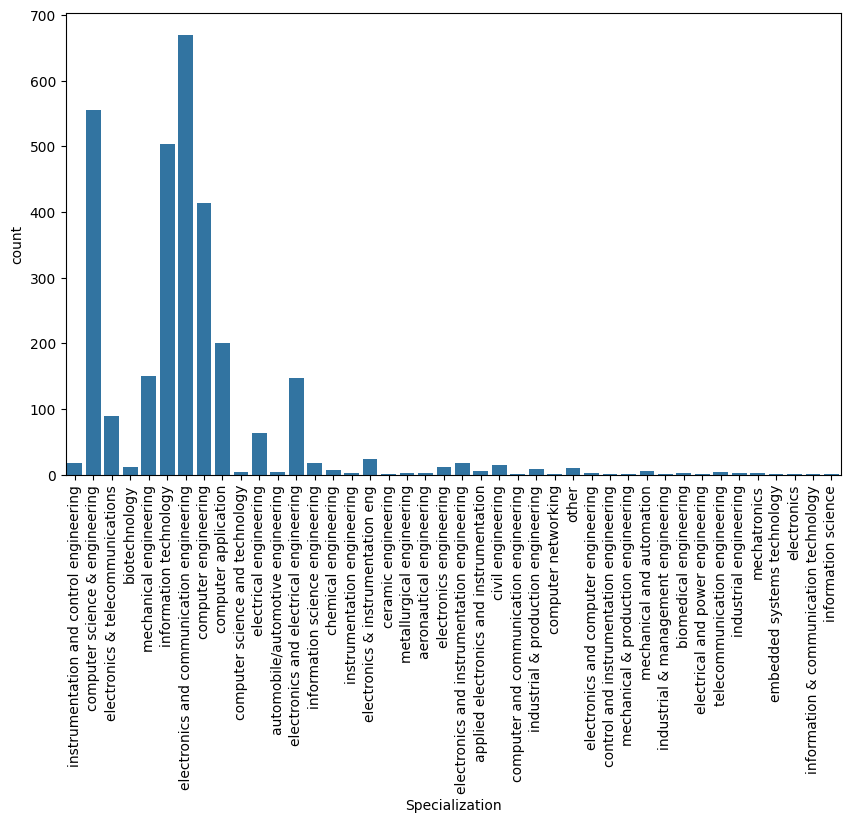

In [100]:
# repartition des étudiants selon leur specialité 
plt.figure(figsize=(10, 6))
sb.countplot(data=df, x='Specialization')
plt.xticks(rotation=90)
plt.show()

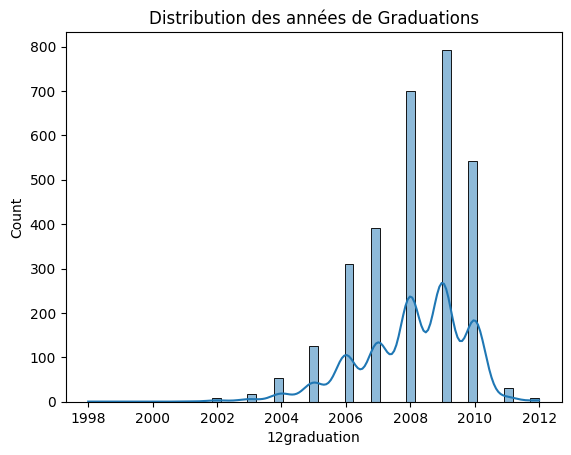

In [101]:
# Distribution des Graduations maximales
sb.histplot(df['12graduation'], kde=True)
plt.title('Distribution des années de Graduations')
plt.show()

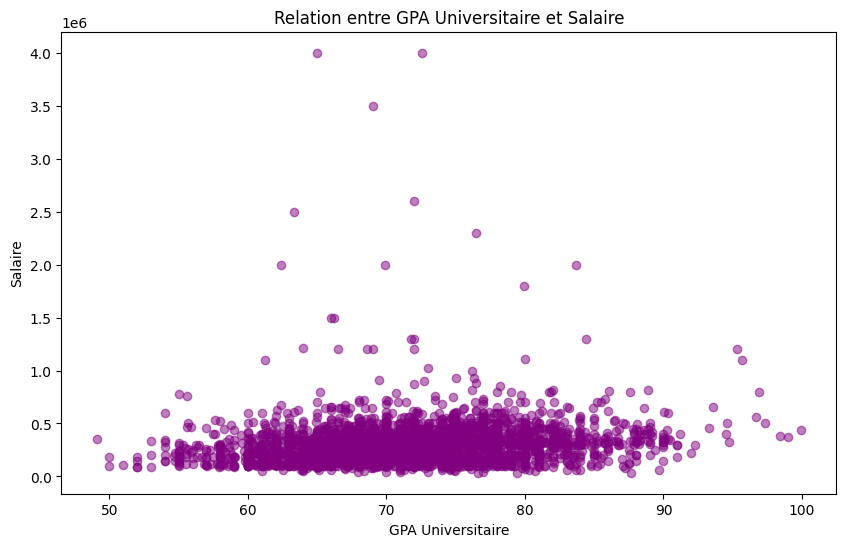

In [102]:
# Commencons à présent à mettre en relation différentes variables :

# Nuage de points pour la relation entre GPA universitaire et salaire
plt.figure(figsize=(10, 6))
plt.scatter(df['collegeGPA'], df['Salary'], alpha=0.5, color='purple')
plt.title("Relation entre GPA Universitaire et Salaire")
plt.xlabel("GPA Universitaire")
plt.ylabel("Salaire")
plt.show()


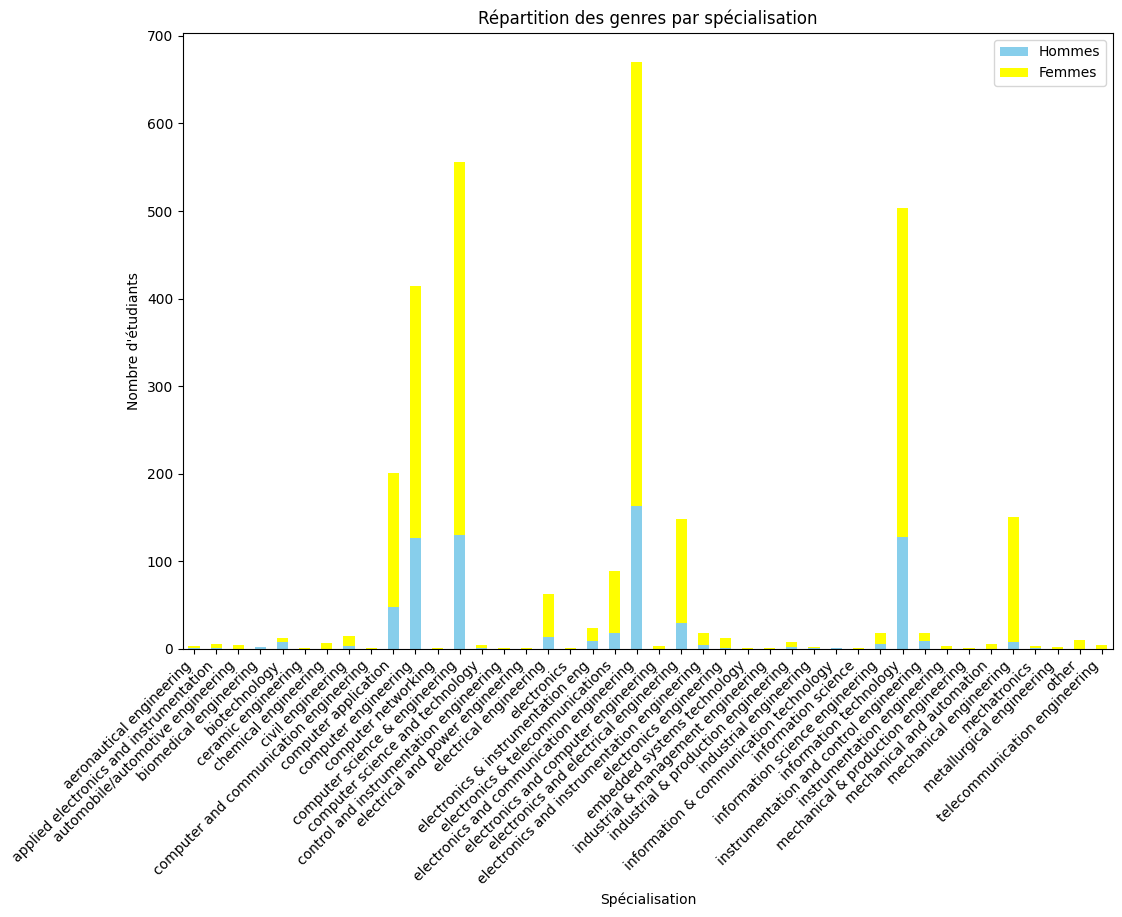

In [103]:
# répartion H/F par spécialisation
# Compter le nombre d'hommes et de femmes par spécialisation
gender_specialization = df.groupby(['Specialization', 'Gender']).size().unstack()

# Créer le graphique en barres empilées
gender_specialization.plot(kind='bar', stacked=True, figsize=(12, 8), color=['skyblue', 'yellow'])
plt.title('Répartition des genres par spécialisation')
plt.xlabel('Spécialisation')
plt.ylabel('Nombre d\'étudiants')
plt.legend(['Hommes', 'Femmes'])
plt.xticks(rotation=45, ha='right')
plt.show()

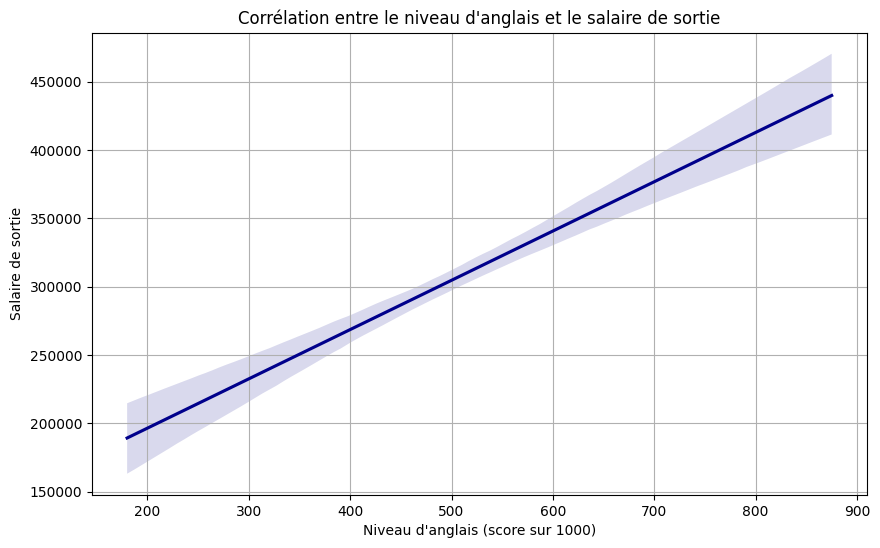

In [104]:
#correlation entre niveau d'anglais et salaire
# Créer le nuage de points
plt.figure(figsize=(10, 6))
#sb.scatterplot(x='English', y='Salary', data=df, color='skyblue', edgecolor='black', alpha=0.7)

# Ajouter une ligne de tendance pour visualiser la corrélation
sb.regplot(x='English', y='Salary', data=df, scatter=False, color='darkblue')

# Paramètres du graphique
plt.title('Corrélation entre le niveau d\'anglais et le salaire de sortie')
plt.xlabel('Niveau d\'anglais (score sur 1000)')
plt.ylabel('Salaire de sortie')
plt.grid(True)
plt.show()

/var/folders/qd/y65ns4y557vgq48x_m8c4f200000gn/T/ipykernel_12655/3715458733.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='Gender', y='extraversion', data=df, palette='Set2')


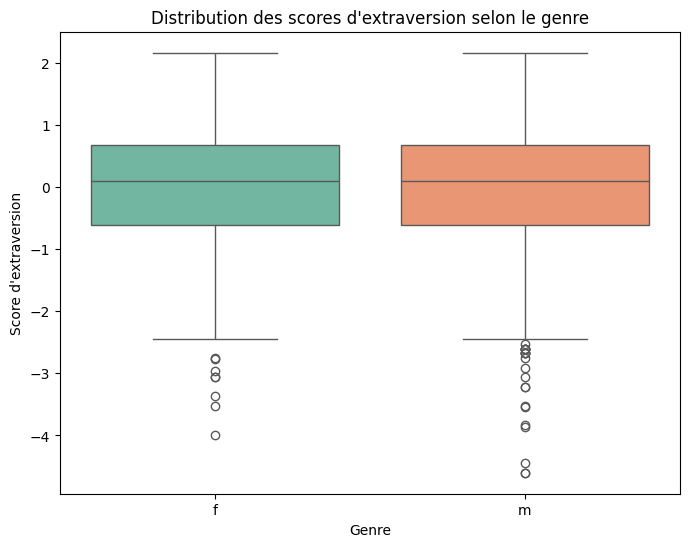

In [105]:
# Créer un boxplot pour comparer les scores d'extraversion entre les genres
plt.figure(figsize=(8, 6))
sb.boxplot(x='Gender', y='extraversion', data=df, palette='Set2')

# Paramètres du graphique
plt.title('Distribution des scores d\'extraversion selon le genre')
plt.xlabel('Genre')
plt.ylabel('Score d\'extraversion')
plt.show()

/var/folders/qd/y65ns4y557vgq48x_m8c4f200000gn/T/ipykernel_12655/3581313430.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='Gender', y='agreeableness', data=df, palette='Set2')


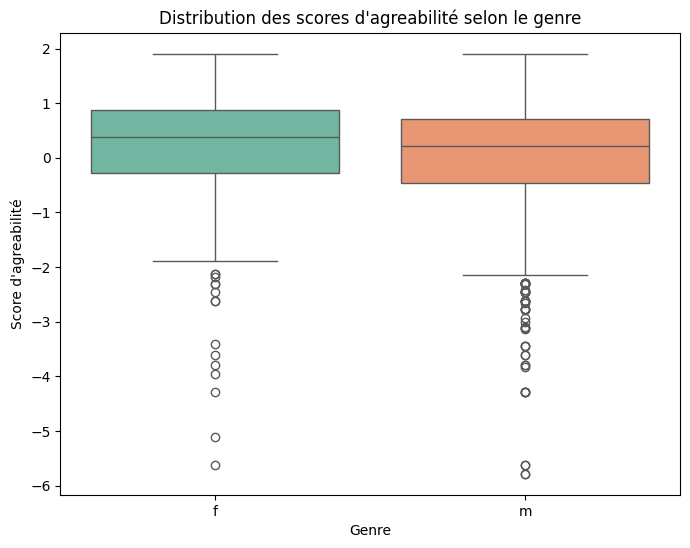

In [106]:
# Créer un boxplot pour comparer les scores d'agréabilité entre les genres
plt.figure(figsize=(8, 6))
sb.boxplot(x='Gender', y='agreeableness', data=df, palette='Set2')

# Paramètres du graphique
plt.title('Distribution des scores d\'agreabilité selon le genre')
plt.xlabel('Genre')
plt.ylabel('Score d\'agreabilité')
plt.show()

# 4. Préparation pour la modélisation
• Diviser les données en ensembles d'entraînement et de test <br>
• Normaliser/standardiser les features ( caractéristiques) si nécessaire

In [107]:
from sklearn.model_selection import train_test_split


# Supposons que vous souhaitiez prédire le salaire avec les autres colonnes comme caractéristiques
X = df.drop(columns=['Salary'])  # Caractéristiques (features), en excluant la colonne cible
y = df['Salary']  # Variable cible (target)

# Diviser les données en ensemble d'entraînement et de test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Ensemble d'entraînement :", X_train.shape)
print("Ensemble de test :", X_test.shape)


Ensemble d'entraînement : (2390, 34)
Ensemble de test : (598, 34)


In [108]:
print(X_train.describe())
print(X_test.describe())

                 ID                            DOB  10percentage  \
count  2.390000e+03                           2390   2390.000000   
mean   6.659770e+05  1990-12-15 17:42:13.556485376     77.717184   
min    1.124400e+04            1983-02-23 00:00:00     43.000000   
25%    3.340908e+05            1989-11-22 12:00:00     71.300000   
50%    6.404360e+05            1991-03-18 12:00:00     79.000000   
75%    9.949558e+05            1992-03-10 18:00:00     85.380000   
max    1.297805e+06            1995-01-10 00:00:00     97.760000   
std    3.636527e+05                            NaN      9.867445   

       12graduation  12percentage     CollegeID  CollegeTier   collegeGPA  \
count   2390.000000   2390.000000   2390.000000  2390.000000  2390.000000   
mean    2008.093724     74.475151   5266.859414     1.925105    71.763351   
min     2001.000000     45.000000      2.000000     1.000000    49.070000   
25%     2007.000000     66.000000    547.000000     2.000000    66.620000   
50

# 5. Régression linéaire
• Implémenter une régression linéaire multiple pour prédire une variable continue <br>
• Évaluer le modèle (R², RMSE) et interpréter les coefficients

/Users/adrienne/Docus/GitHub/Projet_python_data/.conda/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/adrienne/Docus/GitHub/Projet_python_data/.conda/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Performances sur l'ensemble d'entraînement :
  - RMSE : 116579.30
  - R²   : 0.71

Performances sur l'ensemble de test :
  - RMSE : 176543.10
  - R²   : 0.17

Validation croisée :
RMSE moyen : 0.49
RMSE par fold : [0.46666112 0.49125811 0.54883132 0.47385228 0.48807708]


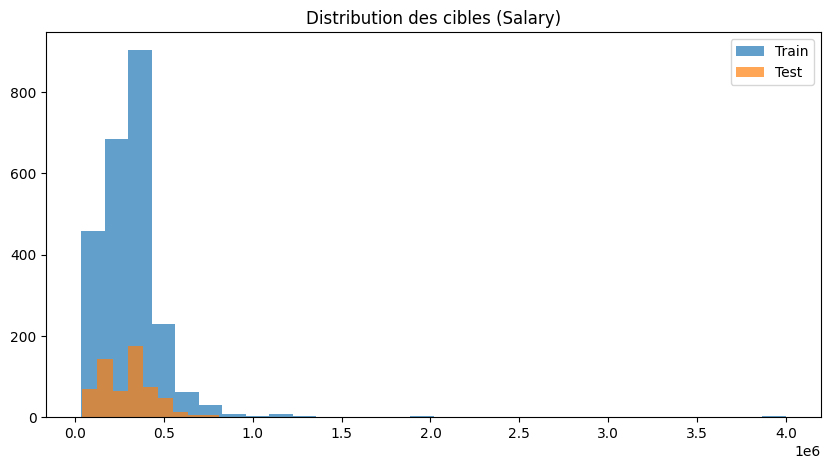

In [112]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Supposons que vous souhaitez prédire le salaire
X = df.drop(columns=['Salary'])  # Caractéristiques (features), en excluant la colonne cible
y = df['Salary']  # Variable cible (target)

# Diviser les données en ensemble d'entraînement et de test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifier les colonnes numériques, catégoriques et datetime
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns
datetime_columns = X_train.select_dtypes(include=['datetime64']).columns

# Étape 1 : Nettoyage des colonnes catégoriques
for col in categorical_columns:
    # Uniformiser les chaînes (minuscules et suppression des espaces inutiles)
    X_train[col] = X_train[col].str.strip().str.lower()
    X_test[col] = X_test[col].str.strip().str.lower()
    # Remplacer les valeurs incohérentes comme "0" par "unknown"
    X_train[col] = X_train[col].replace('0', 'unknown')
    X_test[col] = X_test[col].replace('0', 'unknown')

    # Regrouper les catégories rares en "other"
    rare_threshold = 10  # Seuil pour regrouper les catégories rares
    rare_categories = X_train[col].value_counts()[X_train[col].value_counts() < rare_threshold].index
    X_train[col] = X_train[col].apply(lambda x: x if x not in rare_categories else 'other')
    X_test[col] = X_test[col].apply(lambda x: x if x in X_train[col].unique() else 'other')

# Étape 2 : Transformation des colonnes datetime en années
for col in datetime_columns:
    X_train[col] = X_train[col].dt.year
    X_test[col] = X_test[col].dt.year

# Étape 3 : Préparation de la pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Standardisation des colonnes numériques
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)  # Encodage des colonnes catégoriques
    ],
    remainder='passthrough'  # Inclure toutes les colonnes restantes (par exemple, datetime déjà transformé)
)

# Appliquer la transformation sur les données
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Étape 4 : Transformation logarithmique des cibles
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Étape 5 : Réduction des caractéristiques avec un modèle intermédiaire
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

feature_selector = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42))
feature_selector.fit(X_train_encoded, y_train_log)

X_train_selected = feature_selector.transform(X_train_encoded)
X_test_selected = feature_selector.transform(X_test_encoded)

# Étape 6 : Modèle Gradient Boosting
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train_selected, y_train_log)

# Prédire sur les ensembles d'entraînement et de test
y_train_pred_log = model.predict(X_train_selected)
y_test_pred_log = model.predict(X_test_selected)

# Retour à l'échelle originale
y_train_pred = np.expm1(y_train_pred_log)
y_test_pred = np.expm1(y_test_pred_log)

# Étape 7 : Évaluer les performances
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)  # RMSE sur train
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)  # RMSE sur test
train_r2 = r2_score(y_train, y_train_pred)  # R² sur train
test_r2 = r2_score(y_test, y_test_pred)  # R² sur test

print(f"Performances sur l'ensemble d'entraînement :")
print(f"  - RMSE : {train_rmse:.2f}")
print(f"  - R²   : {train_r2:.2f}")

print(f"\nPerformances sur l'ensemble de test :")
print(f"  - RMSE : {test_rmse:.2f}")
print(f"  - R²   : {test_r2:.2f}")

# Étape 8 : Validation croisée
cv_scores = cross_val_score(model, X_train_selected, y_train_log, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

print("\nValidation croisée :")
print(f"RMSE moyen : {cv_rmse_scores.mean():.2f}")
print(f"RMSE par fold : {cv_rmse_scores}")

# Étape 9 : Visualisation des distributions des cibles
plt.figure(figsize=(10, 5))
plt.hist(y_train, bins=30, alpha=0.7, label='Train')
plt.hist(y_test, bins=30, alpha=0.7, label='Test')
plt.legend()
plt.title('Distribution des cibles (Salary)')
plt.show()


In [110]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identifier les colonnes catégoriques
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
print("Colonnes catégoriques :", categorical_columns)

# Nettoyage des colonnes catégoriques
for col in categorical_columns:
    X_train[col] = X_train[col].str.strip().str.lower()
    X_test[col] = X_test[col].str.strip().str.lower()

# Remplacez les valeurs incohérentes -> les 0 en 'unknown' car OneHotEncoder ne gère pas les chiffres
X_train['10board'] = X_train['10board'].replace({'0': 'unknown'})
X_test['10board'] = X_test['10board'].replace({'0': 'unknown'})

for col in categorical_columns:
    print(f"Colonne {col} : {X_train[col].unique()}")
    print(f"Valeurs manquantes dans {col} :", X_train[col].isnull().sum())

# Conversion des colonnes datetime64 en numérique (timestamp)
for col in X_train.select_dtypes(include=['datetime64']).columns:
    X_train[col] = X_train[col].astype('int64')  # Timestamp
    X_test[col] = X_test[col].astype('int64')

# Remplacer les valeurs aberrantes par NaN
columns_to_clean = ['MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']
for col in columns_to_clean:
    X_train[col] = X_train[col].replace(-1.0, np.nan)
    X_test[col] = X_test[col].replace(-1.0, np.nan)

# Imputation des NaN (par exemple, avec la médiane)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_train[columns_to_clean] = imputer.fit_transform(X_train[columns_to_clean])
X_test[columns_to_clean] = imputer.transform(X_test[columns_to_clean])


# OneHotEncoding pour les colonnes catégoriques
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)], remainder='passthrough')

X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

Colonnes catégoriques : Index(['Gender', '10board', '12board', 'Degree', 'Specialization',
       'CollegeState', '12board_category'],
      dtype='object')
Colonne Gender : ['m' 'f']
Valeurs manquantes dans Gender : 0
Colonne 10board : ['cbse' 'icse' 'state board' 'unknown' 'up board' 'ssc' 'other'
 'board of secondary education' 'rbse' 'wbbse' 'up' 'matriculation']
Valeurs manquantes dans 10board : 0
Colonne 12board : ['state board' 'icse' 'cbse' 'other' 'unknown' 'up board' 'isc'
 'board of intermediate' 'board of intermediate education' 'rbse' 'up']
Valeurs manquantes dans 12board : 0
Colonne Degree : ['b.tech/b.e.' 'mca' 'm.tech./m.e.' 'other']
Valeurs manquantes dans Degree : 0
Colonne Specialization : ['information technology' 'electronics and communication engineering'
 'computer science & engineering' 'electronics and electrical engineering'
 'electronics & instrumentation eng' 'computer engineering'
 'computer application' 'civil engineering' 'electrical engineering'
 'other'

In [111]:
from sklearn.preprocessing import StandardScaler
X_train_dense = X_train_encoded.toarray()  # Convertir en matrice dense
X_test_dense = X_test_encoded.toarray()
scaler = StandardScaler()
# Standardiser les données encodées (après OneHotEncoder)
X_train_scaled = scaler.fit_transform(X_train_dense)
X_test_scaled = scaler.transform(X_test_dense)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialiser le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train_scaled, y_train)

# Prédire les valeurs sur l'ensemble d'entraînement et de test
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Évaluer les performances du modèle
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)  # RMSE sur train
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)  # RMSE sur test
train_r2 = r2_score(y_train, y_train_pred)  # R² sur train
test_r2 = r2_score(y_test, y_test_pred)  # R² sur test

# Afficher les métriques de performance
print(f"Performances sur l'ensemble d'entraînement :")
print(f"  - RMSE : {train_rmse:.2f}")
print(f"  - R²   : {train_r2:.2f}")

print(f"\nPerformances sur l'ensemble de test :")
print(f"  - RMSE : {test_rmse:.2f}")
print(f"  - R²   : {test_r2:.2f}")


AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

# 6. Classification et Machine Learning
• Comparer ces algorithmes et choisir le plus adapté pour votre étude : <br>
    •  Régression logistique<br>
    • Arbre de décision<br>
    • Random Forest<br>
• SVM<br>
• Évaluer les performances (précision, rappel, F1-score, courbe ROC)<br>
• Optimiser les hyperparamètres avec GridSearchCV ou RandomizedSearchCV

# 8. Prédiction et Déploiement du Modèle
• Sélectionner le meilleur modèle basé sur les performances<br>
• Entraîner le modèle final sur l'ensemble des données<br>
• Créer une fonction de prédiction qui prend en entrée des caractéristiques
(features) et permet de prédire des résultats (à vous de préciser quel type de 
résultat prédire)<br>
• Développer une interface simple pour utiliser le modèle (par exemple, avec 
Streamlit ou Flask)


# 9. Interprétation et conclusions
• Résumer les principaux insights de l'analyse<br>
• Identifier les facteurs les plus importants pour la prédiction selon le domaine 
choisi<br>
• Proposer des recommandations basées sur les résultats